# Machine Learning Python Exercise 4.1: Neural Network Learning

In [1]:
import numpy as np # linear algebra
from numpy import loadtxt, where
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import numpy.matlib
from scipy.stats import logistic # sigmoid function
import scipy.optimize as opt
import scipy.io
import random

import os
print(os.listdir("../ex4"))

['.ipynb_checkpoints', 'Ex4.ipynb', 'ex4data1.mat', 'ex4weights.mat']


## Instructions

This file  contains code that helps you get started on the linear exercise. You will need to complete functions in this exercise. The instructions can be found in this notebook, which will load the  program as you complete the exercises. If you need to change the code in a certain section, it will be clearly indicated.

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10
                        # (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data
We start the exercise by first loading and visualizing the dataset. You will be working with a dataset that contains handwritten digits.

In [3]:
data = scipy.io.loadmat('ex4data1.mat') # load in the data from the provided .mat file

X = data["X"]
y = data["y"]
m = len(y)

theta = scipy.io.loadmat('ex4weights.mat') # load in the weights from the provided .mat file

theta1 = theta['Theta1']
theta2 = theta['Theta2']
nn_params = np.append(theta1, theta2).reshape(10285,1)

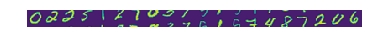

In [4]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

## Part 2: Compute Cost (Feedforward)
To the neural network, you should first start by implementing the feedforward part of the neural network that returns the cost only. You should complete the code to return cost. After implementing the feedforward to compute the cost, you can verify that your implementation is correct by verifying that you get the same cost as us for the fixed debugging parameters.

We suggest implementing the feedforward cost *without* regularization first so that it will be easier for you to debug. Later you will get to implement the regularized cost.

## Complete this nnCostFunction file
Implements the neural network cost function for a two layer neural network which performs classification.

The function computes the cost and gradient of the neural network. The  parameters for the neural network are "unrolled" into the vector nn_params and need to be converted back into the weight matrices.  The returned parameter grad should be a "unrolled" vector of the partial derivatives of the neural network.

Instructions: You should complete the code by working through the following parts. 

Part 1: Feedforward the neural network and return the cost in the variable J. After implementing Part 1, you can verify that your cost function computation is correct by comparing the cost computed to the expected value.

Part 2: Implement the backpropagation algorithm to compute the gradients Theta1_grad and Theta2_grad. You should return the partial derivatives of the cost function with respect to Theta1 and Theta2 in Theta1_grad and Theta2_grad, respectively. 

Note: The vector y passed into the function is a vector of labels containing values from 1..K. You need to map this vector into a binary vector of 1's and 0's to be used with the neural network cost function.

Hint: We recommend implementing backpropagation using a for-loop over the training examples if you are implementing it for the first time.

Part 3: Implement regularization with the cost function and gradients.

Hint: You can implement this around the code for backpropagation. That is, you can compute the gradients for the regularization separately and then add them to Theta1_grad and Theta2_grad from Part 2.

In [5]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_var):
    # Reshape nn_params
    Theta1 = nn_params[0:(hidden_layer_size * (input_layer_size + 1))].reshape(hidden_layer_size, (input_layer_size + 1))
    Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):].reshape(num_labels, (hidden_layer_size + 1))
    
    m = X.shape[0]
    X = np.c_[np.ones((X.shape[0],1)), X] # add column of ones to X
    ## Your code
    
    # correct answer
    y_matrix = pd.get_dummies(y.ravel()).values
    
    a1 = X # column of ones already added
    z2 = np.dot(Theta1, a1.T) # Theta1 * a1'
    a2 = np.c_[np.ones((X.shape[0],1)),logistic.cdf(z2.T)] # add column of ones to a2

    z3 = np.dot(Theta2, a2.T) # Theta2 * a2'
    a3 = logistic.cdf(z3) # sigmoid(z3)
    
    reg = (lambda_var/(2*m))*(np.sum(np.square(Theta1[:,1:])) + np.sum(np.square(Theta2[:,1:])))
    
    J = -1*(1/m)*np.sum((np.log(a3.T)*(y_matrix)+np.log(1-a3).T*(1-y_matrix))) + reg # cost function with regularization

    d3 = a3.T-y_matrix
    d2 = np.dot(Theta2[:,1:].T, d3.T) * (logistic.cdf(z2)*(1-logistic.cdf(z2)))
        
    Delta1 = np.dot(d2, a1)
    Delta2 = np.dot(d3.T, a2)
    
    Theta1_grad = 1/m * Delta1 + (lambda_var/m) * np.column_stack((np.ones((Theta1.shape[0],1)), Theta1[:, 1:]))
    Theta2_grad = 1/m * Delta2 + (lambda_var/m) * np.column_stack((np.ones((Theta2.shape[0],1)), Theta2[:, 1:]))
        
    return J

In [6]:
lambda_var = 0

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_var)

print('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.287629)\n' % J);

Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)



## Part 3: Implement Regularization
Once your cost function implementation is correct, you should now continue to implement the regularization with the cost.

In [7]:
lambda_var = 1

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_var)

print('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.383770)\n' % J);

Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



## Part 4: Sigmoid Gradient
Before you start implementing the neural network, you will first implement the gradient for the sigmoid function. 

## Complete this sigmoidGradient file
This function computes the gradient of the sigmoid function evaluated at z. This should work regardless if z is a matrix or a vector. In particular, if z is a vector or matrix, you should return the gradient for each element.

Instructions: Compute the gradient of the sigmoid function evaluated at each value of z (z can be a matrix, vector or scalar) and the function should return the gradient g.

In [8]:
def sigmoidGradient(z):
    ## Your code
    
    # correct answer
    g = logistic.cdf(z) * (1-logistic.cdf(z))
    
    return g

In [9]:
g = sigmoidGradient([-1, -0.5, 0, 0.5, 1]);

g_correct = np.array([0.196612, 0.235004, 0.250000, 0.235004, 0.196612])

print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
print(' [{}] '.format(g))
print('\nShould be about {})\n\n'.format(g_correct))
print('\n\n');

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
 [[0.19661193 0.23500371 0.25       0.23500371 0.19661193]] 

Should be about [0.196612 0.235004 0.25     0.235004 0.196612])







## Part 5: Initializing Parameters
In this part of the exercise, you will be starting to implement a two layer neural network that classifies digits. You will start by implementing a function to initialize the weights of the neural network.

randInitializeWeights randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing connections. 

Note that W should be set to a matrix of size(L_out, 1 + L_in) as the first column of W handles the "bias" terms.

Instructions: Initialize W randomly so that we break the symmetry while training the neural network.

Note: The first column of W corresponds to the parameters for the bias unit.

In [10]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.uniform(0.0, 1.0, ((L_out, L_in+1))) * epsilon_init - epsilon_init
    
    return W

In [11]:
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

#Unroll parameters
initial_nn_params = np.append(initial_Theta1.ravel(), initial_Theta2.ravel())
initial_nn_params = np.array(initial_nn_params[:, np.newaxis])

## Part 6: Implement Backpropagation (Consider deleting)
Once your cost matches up with ours, you should proceed to implement the backpropagation algorithm for the neural network. You should add to the code you've written in nnCostFunction to return the partial derivatives of the parameters in a new function called nnCostFunctionBack.

Instructions: copy the nnCostFunction you created earlier in the field below and add the backpropagation part after setting J and rename the function to nnCostFunctionBack. Make sure the function also returns correct Theta1_grad and Theta2_grad.

In [12]:
## Your code
    
# correct answer
def nnCostFunctionBack(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_var):
    # Reshape nn_params
    Theta1 = nn_params[0:(hidden_layer_size * (input_layer_size + 1))].reshape(hidden_layer_size, (input_layer_size + 1))
    Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):].reshape(num_labels, (hidden_layer_size + 1))

    m = X.shape[0]
    X = np.c_[np.ones((X.shape[0],1)), X]

    y_matrix = pd.get_dummies(y.ravel()).values
    
    a1 = X
    z2 = np.dot(Theta1, a1.T)
    a2 = np.c_[np.ones((X.shape[0],1)),logistic.cdf(z2.T)]

    z3 = np.dot(Theta2, a2.T)
    a3 = logistic.cdf(z3)
    
    reg = (lambda_var/(2*m))*(np.sum(np.square(Theta1[:,1:])) + np.sum(np.square(Theta2[:,1:])))
    
    J = -1*(1/m)*np.sum((np.log(a3.T)*(y_matrix)+np.log(1-a3).T*(1-y_matrix))) + reg

    # Backprop part    
    d3 = a3.T-y_matrix
    d2 = np.dot(Theta2[:,1:].T, d3.T) * (logistic.cdf(z2)*(1-logistic.cdf(z2)))
        
    Delta1 = np.dot(d2, a1)
    Delta2 = np.dot(d3.T, a2)
    
    Theta1_grad = 1/m * Delta1 + (lambda_var/m) * np.column_stack((np.ones((Theta1.shape[0],1)), Theta1[:, 1:]))
    Theta2_grad = 1/m * Delta2 + (lambda_var/m) * np.column_stack((np.ones((Theta2.shape[0],1)), Theta2[:, 1:]))
    grad = np.vstack((Theta1_grad.ravel()[:,np.newaxis], Theta2_grad.ravel()[:,np.newaxis]))
    
    return J, grad

## Part 7: Implement Regularization
Once your backpropagation implementation is correct, you should now continue to implement the regularization with the cost and gradient.

In [13]:
lambda_var = 3

debug_J = nnCostFunctionBack(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_var)[0]

print('\nCost at (fixed) debugging parameters (w/ lambda = {}): {}\n (for lambda = 3, this ' 
      'value should be about 0.576051)\n\n'.format(lambda_var, debug_J))


Cost at (fixed) debugging parameters (w/ lambda = 3): 0.5760512469501331
 (for lambda = 3, this value should be about 0.576051)




## Part 8: Training NN
You have now implemented all the code necessary to train a neural network. To train your neural network, we will now use minimize. Recall that advanced optimizers like these are able to train our cost functions efficiently as long as we provide them with the gradient computations. Feel free to experiment a little bit with different values for lambda_var to see what the impact of the regularization is.

In [14]:
def gradientDescent(X, y, theta, alpha, epochs, lambda_var, input_layer_size, hidden_layer_size, num_labels):
    for i in range(0, epochs):
        cost, grad = nnCostFunctionBack(theta, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_var)
        print("Epoch {}, cost: {}".format(i, cost))
        theta = theta - alpha * grad
    return theta

In [15]:
lambda_var = 1

# Set learning rate and number of epochs per label
alpha = 1
n_epochs = 1000

nn_params = gradientDescent(X, y, initial_nn_params, alpha, n_epochs, lambda_var, input_layer_size, 
                            hidden_layer_size, num_labels)

Theta1 = nn_params[0:(hidden_layer_size * (input_layer_size + 1))].reshape(hidden_layer_size, (input_layer_size + 1))
Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):].reshape(num_labels, (hidden_layer_size + 1))

Epoch 0, cost: 6.367669894912635
Epoch 1, cost: 5.102533246169148
Epoch 2, cost: 4.3859415223183085
Epoch 3, cost: 3.958682574191647
Epoch 4, cost: 3.6912139453358908
Epoch 5, cost: 3.518089670433611
Epoch 6, cost: 3.405112228701004
Epoch 7, cost: 3.3336879615656865
Epoch 8, cost: 3.2917673057236874
Epoch 9, cost: 3.2686405441336994
Epoch 10, cost: 3.2553858836119045
Epoch 11, cost: 3.246585081074067
Epoch 12, cost: 3.2396414083503324
Epoch 13, cost: 3.2334390321166913
Epoch 14, cost: 3.2275110628531394
Epoch 15, cost: 3.2216554415152308
Epoch 16, cost: 3.2157757047809565
Epoch 17, cost: 3.209817679478699
Epoch 18, cost: 3.2037446204291826
Epoch 19, cost: 3.197527400959858
Epoch 20, cost: 3.191140594968632
Epoch 21, cost: 3.184560913797512
Epoch 22, cost: 3.1777666319106834
Epoch 23, cost: 3.1707374654242435
Epoch 24, cost: 3.163454683878722
Epoch 25, cost: 3.1559013549951827
Epoch 26, cost: 3.148062664652066
Epoch 27, cost: 3.139926265557569
Epoch 28, cost: 3.1314826059167897
Epoch 29

Epoch 235, cost: 0.939190756093986
Epoch 236, cost: 0.9362961116935195
Epoch 237, cost: 0.933430409458454
Epoch 238, cost: 0.9305932006219882
Epoch 239, cost: 0.9277840465208361
Epoch 240, cost: 0.9250025183437384
Epoch 241, cost: 0.9222481968826038
Epoch 242, cost: 0.9195206722866301
Epoch 243, cost: 0.9168195438197273
Epoch 244, cost: 0.9141444196215215
Epoch 245, cost: 0.9114949164721977
Epoch 246, cost: 0.9088706595613962
Epoch 247, cost: 0.9062712822613601
Epoch 248, cost: 0.9036964259044987
Epoch 249, cost: 0.9011457395655023
Epoch 250, cost: 0.89861887984813
Epoch 251, cost: 0.8961155106767592
Epoch 252, cost: 0.8936353030927698
Epoch 253, cost: 0.8911779350558152
Epoch 254, cost: 0.8887430912500192
Epoch 255, cost: 0.8863304628951068
Epoch 256, cost: 0.883939747562484
Epoch 257, cost: 0.8815706489962442
Epoch 258, cost: 0.8792228769390851
Epoch 259, cost: 0.8768961469630961
Epoch 260, cost: 0.8745901803053723
Epoch 261, cost: 0.8723047037083992
Epoch 262, cost: 0.87003944926514

Epoch 466, cost: 0.630749542680259
Epoch 467, cost: 0.63013951179508
Epoch 468, cost: 0.629532193994176
Epoch 469, cost: 0.6289275685787958
Epoch 470, cost: 0.6283256150648039
Epoch 471, cost: 0.6277263131801512
Epoch 472, cost: 0.627129642862375
Epoch 473, cost: 0.6265355842561245
Epoch 474, cost: 0.6259441177107113
Epoch 475, cost: 0.6253552237776886
Epoch 476, cost: 0.6247688832084541
Epoch 477, cost: 0.62418507695188
Epoch 478, cost: 0.623603786151968
Epoch 479, cost: 0.6230249921455305
Epoch 480, cost: 0.6224486764598942
Epoch 481, cost: 0.6218748208106323
Epoch 482, cost: 0.6213034070993185
Epoch 483, cost: 0.6207344174113076
Epoch 484, cost: 0.6201678340135384
Epoch 485, cost: 0.6196036393523618
Epoch 486, cost: 0.6190418160513943
Epoch 487, cost: 0.6184823469093923
Epoch 488, cost: 0.6179252148981517
Epoch 489, cost: 0.6173704031604322
Epoch 490, cost: 0.6168178950079019
Epoch 491, cost: 0.6162676739191072
Epoch 492, cost: 0.6157197235374662
Epoch 493, cost: 0.6151740276692819


Epoch 698, cost: 0.5353665305696773
Epoch 699, cost: 0.5350832526355654
Epoch 700, cost: 0.5348006760018076
Epoch 701, cost: 0.5345187974595497
Epoch 702, cost: 0.5342376138205135
Epoch 703, cost: 0.5339571219168668
Epoch 704, cost: 0.5336773186010925
Epoch 705, cost: 0.5333982007458626
Epoch 706, cost: 0.5331197652439104
Epoch 707, cost: 0.532842009007904
Epoch 708, cost: 0.5325649289703237
Epoch 709, cost: 0.5322885220833364
Epoch 710, cost: 0.5320127853186742
Epoch 711, cost: 0.5317377156675123
Epoch 712, cost: 0.5314633101403485
Epoch 713, cost: 0.5311895657668837
Epoch 714, cost: 0.5309164795959029
Epoch 715, cost: 0.5306440486951569
Epoch 716, cost: 0.530372270151246
Epoch 717, cost: 0.5301011410695028
Epoch 718, cost: 0.5298306585738773
Epoch 719, cost: 0.5295608198068225
Epoch 720, cost: 0.5292916219291788
Epoch 721, cost: 0.5290230621200623
Epoch 722, cost: 0.5287551375767517
Epoch 723, cost: 0.5284878455145758
Epoch 724, cost: 0.5282211831668028
Epoch 725, cost: 0.52795514778

Epoch 928, cost: 0.4840486184229241
Epoch 929, cost: 0.4838715884567874
Epoch 930, cost: 0.48369486703309095
Epoch 931, cost: 0.48351845331069887
Epoch 932, cost: 0.4833423464522571
Epoch 933, cost: 0.48316654562416655
Epoch 934, cost: 0.48299104999655657
Epoch 935, cost: 0.4828158587432577
Epoch 936, cost: 0.482640971041776
Epoch 937, cost: 0.4824663860732661
Epoch 938, cost: 0.48229210302250586
Epoch 939, cost: 0.48211812107787017
Epoch 940, cost: 0.48194443943130605
Epoch 941, cost: 0.4817710572783066
Epoch 942, cost: 0.48159797381788616
Epoch 943, cost: 0.4814251882525555
Epoch 944, cost: 0.4812526997882969
Epoch 945, cost: 0.48108050763453974
Epoch 946, cost: 0.48090861100413623
Epoch 947, cost: 0.4807370091133372
Epoch 948, cost: 0.480565701181768
Epoch 949, cost: 0.480394686432405
Epoch 950, cost: 0.480223964091552
Epoch 951, cost: 0.48005353338881657
Epoch 952, cost: 0.4798833935570872
Epoch 953, cost: 0.4797135438325104
Epoch 954, cost: 0.47954398345446736
Epoch 955, cost: 0.4

## Part 9: Visualize Weights
You can now "visualize" what the neural network is learning by displaying the hidden units to see what features they are capturing in the data.

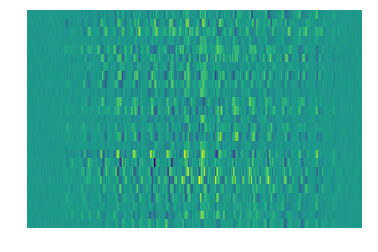

In [16]:
plt.imshow(Theta1[:, 1:], aspect='auto')
plt.axis('off');

## Part 10: Implement Predict
After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the neural network to predict the labels of the training set. This lets you compute the training set accuracy.

predict(Theta1, Theta2, X) outputs the predicted label of X given the trained weights of a neural network (Theta1, Theta2).

In [17]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    
    X = np.c_[np.ones((X.shape[0],1)), X]

    h1 = logistic.cdf(np.dot(X, Theta1.T))
    h1 = np.c_[np.ones((h1.shape[0],1)), h1]

    h2 = logistic.cdf(np.dot(h1, Theta2.T))
    
    pred = np.argmax(h2, axis=1)
    
    return pred+1

In [19]:
pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy: {}\n'.format(np.mean(np.double(pred == y)) * 100))

pred = pred[:, np.newaxis]

def accuracy_score_new(y_pred, y_true):
    matched = 0 # initialize number of correct answers
    for y_p, y_t in zip(y_pred, y_true): # loop over all predicted and real values
        if y_t in y_p:
            matched = matched + 1 # add 1 to for each correctly predicted answer

    return (matched / len(y_true)) * 100 # returns the number of correct answers divided 
                                            # by number of total predictions * 100

accuracy = accuracy_score_new(pred,y)

# of right predictions/accuracy
print('Train Accuracy: %f' % accuracy, '%')


Training Set Accuracy: 10.0

Train Accuracy: 95.460000 %
